In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [2]:


# display all columns
pd.set_option('display.max_columns', None)


wt_t = pd.read_excel("Perseus_Analysis_E221107_NataliaStec_WT-DMSO_vs_WT-E20.xlsx")
ko = pd.read_excel("Perseus_Analysis_E221107_NataliaStec_WT-DMSO_vs_HuRKO-DMSO.xlsx")
ko_t = pd.read_excel("Perseus_Analysis_E221107_NataliaStec_HuRKO-DMSO_vs_HuRKO-E20.xlsx")

wt_t.shape, ko.shape, ko_t.shape

((9046, 25), (9046, 25), (9046, 25))

# 01. Keep significant

In [3]:
# 01. 

print(f"Shape before: {wt_t.shape}")
wt_t =  wt_t[wt_t["Student's T-test Significant WT-DMSO_WT-E20"]=="+"]
print(f"Shape after: {wt_t.shape}")

Shape before: (9046, 25)
Shape after: (2998, 25)


In [4]:
print(f"Shape before: {ko.shape}")
ko = ko[ko["Student's T-test Significant WT-DMSO_HuRKO-DMSO"]=="+"]
print(f"Shape after: {ko.shape}")

Shape before: (9046, 25)
Shape after: (2809, 25)


In [5]:
print(f"Shape before: {ko_t.shape}")
ko_t = ko_t[ko_t["Student's T-test Significant HuRKO-DMSO_HuRKO-E20"]=="+"]
print(f"Shape after: {ko_t.shape}")

Shape before: (9046, 25)
Shape after: (641, 25)


# 02. Filtering based on intervals

Values are log2 transformed, we want things twice or more up/down-regulated.

In [6]:
print(f"Shape before: {wt_t.shape}")
wt_t = wt_t[wt_t["Student's T-test Difference WT-DMSO_WT-E20"].abs() > 1.0]
print(f"Shape after: {wt_t.shape}")

Shape before: (2998, 25)
Shape after: (154, 25)


In [7]:
print(f"Shape before: {ko.shape}")
ko = ko[ko["Student's T-test Difference WT-DMSO_HuRKO-DMSO"].abs() > 1.0]
print(f"Shape after: {ko.shape}")

Shape before: (2809, 25)
Shape after: (477, 25)


In [8]:
print(f"Shape before: {ko_t.shape}")
ko_t = ko_t[ko_t["Student's T-test Difference HuRKO-DMSO_HuRKO-E20"].abs() > 1.0]
print(f"Shape after: {ko_t.shape}")

Shape before: (641, 25)
Shape after: (61, 25)


# Split based on up/down-regulation

In [9]:
wt_t_up = wt_t[wt_t["Student's T-test Difference WT-DMSO_WT-E20"] < -1.0]
wt_t_down = wt_t[wt_t["Student's T-test Difference WT-DMSO_WT-E20"] > 1.0]

print(f"Shapes: {wt_t_up.shape}, {wt_t_down.shape} == {wt_t.shape}") 

Shapes: (45, 25), (109, 25) == (154, 25)


In [10]:
ko_up = ko[ko["Student's T-test Difference WT-DMSO_HuRKO-DMSO"] < -1.0]
ko_down = ko[ko["Student's T-test Difference WT-DMSO_HuRKO-DMSO"] > 1.0]

print(f"Shapes: {ko_up.shape}, {ko_down.shape} == {ko.shape}")

Shapes: (229, 25), (248, 25) == (477, 25)


In [11]:
ko_t_up = ko_t[ko_t["Student's T-test Difference HuRKO-DMSO_HuRKO-E20"] < -1.0]
ko_t_down = ko_t[ko_t["Student's T-test Difference HuRKO-DMSO_HuRKO-E20"] > 1.0]

print(f"Shapes: {ko_t_up.shape}, {ko_t_down.shape}, == {ko_t.shape}")

Shapes: (20, 25), (41, 25), == (61, 25)


# Overlap analysis

In [12]:
# merge 

UP_MERGED = pd.merge(ko_t_up[["Genes", "Student's T-test Difference HuRKO-DMSO_HuRKO-E20"]], wt_t_up[["Genes", "Student's T-test Difference WT-DMSO_WT-E20"]], on="Genes", how="outer").merge(ko_up[["Genes", "Student's T-test Difference WT-DMSO_HuRKO-DMSO"]], on="Genes", how="outer").sort_values(by="Genes")
DOWN_MERGED = pd.merge(ko_t_down[["Genes", "Student's T-test Difference HuRKO-DMSO_HuRKO-E20"]], wt_t_down[["Genes", "Student's T-test Difference WT-DMSO_WT-E20"]], on="Genes", how="outer").merge(ko_down[["Genes", "Student's T-test Difference WT-DMSO_HuRKO-DMSO"]], on="Genes", how="outer").sort_values(by="Genes")

## UP

In [13]:
OVERLAPPING_UP_MERGED = UP_MERGED[UP_MERGED.isna().sum(axis=1)<=1].reset_index(drop=True).sort_values(by="Genes", ascending=True)
OVERLAPPING_UP_MERGED

,Genes,Student's T-test Difference HuRKO-DMSO_HuRKO-E20,Student's T-test Difference WT-DMSO_WT-E20,Student's T-test Difference WT-DMSO_HuRKO-DMSO
0,AKR1C2,NaN,-1.563329,-3.298530
1,CTGF,NaN,-1.376413,-1.946327
2,EFEMP1,-1.078254,-2.765603,NaN
3,GDF15,NaN,-1.098289,-1.549348
4,IFRD1,-2.003921,-3.176128,NaN
5,IREB2,NaN,-1.348315,-1.431301
6,KDM3A,-1.122491,-1.071396,NaN
7,LBHD2,NaN,-1.030611,-2.625185
8,MON2,-1.151378,-1.262904,NaN
9,P4HA1,-1.475825,-1.317265,NaN


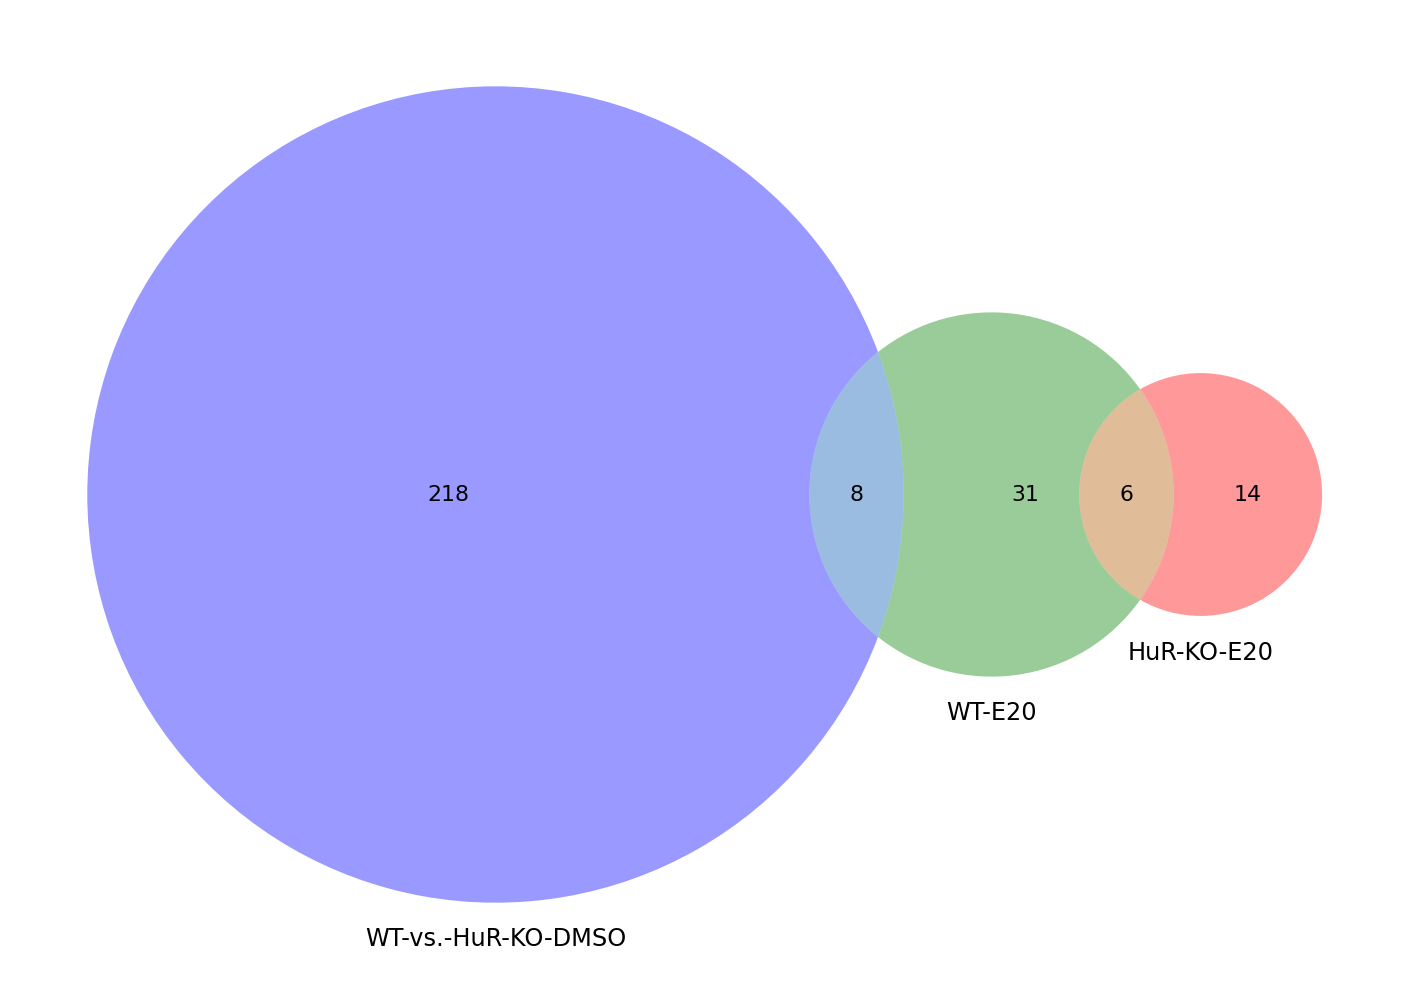

In [14]:
# venn diagram of "Genes" columns from upregulated dataframes

plt.figure(figsize=(25,25))


fig = venn3([set(ko_t_up["Genes"]), set(wt_t_up["Genes"]), set(ko_up["Genes"])], set_labels = ('HuR-KO-E20', 'WT-E20', 'WT-vs.-HuR-KO-DMSO'), set_colors=('r', 'g', 'b'), alpha=0.4, normalize_to=1.0)

for text in fig.set_labels:
    text.set_fontsize(24)
for text in fig.subset_labels:
    if text:
        text.set_fontsize(22)




# save the figure
plt.savefig("venn_diagram_upregulated.jpg")
plt.show()
plt.close()

## DOWN

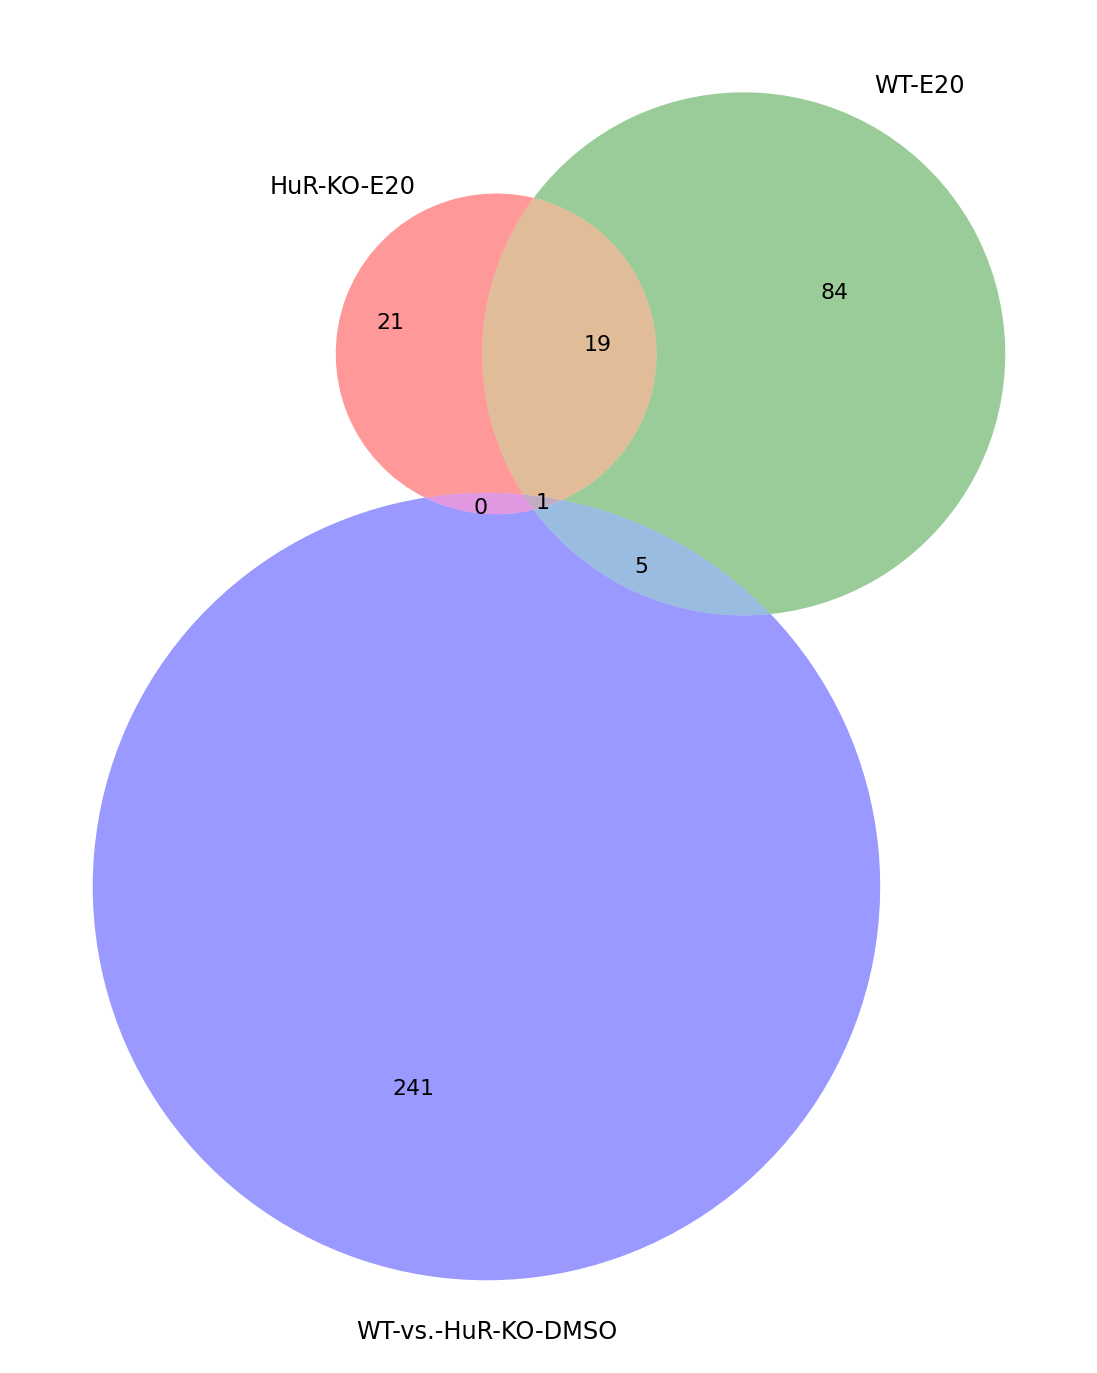

In [15]:
# venn diagram of "Genes" columns from downregulated dataframes
plt.figure(figsize=(25,25))

fig = venn3([set(ko_t_down["Genes"]), set(wt_t_down["Genes"]), set(ko_down["Genes"])], set_labels = ('HuR-KO-E20', 'WT-E20', 'WT-vs.-HuR-KO-DMSO'), set_colors=('r', 'g', 'b'), alpha=0.4, normalize_to=1.0)

for text in fig.set_labels:
    text.set_fontsize(24)
for text in fig.subset_labels:
    if text:
        text.set_fontsize(22)




# save the figure
plt.savefig("venn_diagram_downregulated.jpg")
plt.show()
plt.close()

In [16]:
OVERLAPPING_DOWN_MERGED = DOWN_MERGED[DOWN_MERGED.isna().sum(axis=1)<=1].reset_index(drop=True).sort_values(by="Genes", ascending=True)
OVERLAPPING_DOWN_MERGED

,Genes,Student's T-test Difference HuRKO-DMSO_HuRKO-E20,Student's T-test Difference WT-DMSO_WT-E20,Student's T-test Difference WT-DMSO_HuRKO-DMSO
0,CDT1,1.521299,1.691809,NaN
1,CGA,NaN,2.242831,6.614213
2,DDX11,1.069162,1.343341,NaN
3,EFHD1,NaN,1.037879,1.460240
4,ELP3,1.335864,1.727489,NaN
5,FDFT1,1.684698,1.495616,NaN
6,FDX1,1.367355,1.791100,NaN
7,FECH,1.167544,1.485250,NaN
8,HMGCR,2.191497,1.404247,NaN
9,HMGCS1,1.226283,1.231774,NaN


# SAVING

In [17]:
# save to excel in different sheets

with pd.ExcelWriter("OVERLAPPING.xlsx") as writer:
    OVERLAPPING_UP_MERGED.to_excel(writer, sheet_name="OVERLAPPING_UP_MERGED", index=False)
    OVERLAPPING_DOWN_MERGED.to_excel(writer, sheet_name="OVERLAPPING_DOWN_MERGED", index=False)

In [18]:
# save MERGED to different sheets

with pd.ExcelWriter("MERGED.xlsx") as writer:
    UP_MERGED.to_excel(writer, sheet_name="UP_MERGED", index=False)
    DOWN_MERGED.to_excel(writer, sheet_name="DOWN_MERGED", index=False)